In [ ]:
import tensorflow as tf
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import seaborn as sns
import cv2

In [ ]:
import pandas as pd
import numpy as np
import math
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Feature engineering

In [ ]:
Domain_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLDOMAIN_MCLS2.csv')
Domain_data.drop(["Unnamed: 0"], axis=1, inplace=True)
Domain_data.head()

,domain_name,dga_family,domain,length,entropy,first_Digit_Index,H_entropy,vowel_consonant_ratio,vowel_character_ratio,consonant_character_ratio,level_no,alexa_grams,words_grams
0,odqzesdvd.info,nymaim,odqzesdvd,9,2.641604,0,3.324863,0.444444,0.285714,0.642857,2,8.618689,10.200253
1,mcrwnxdzu.info,nymaim,mcrwnxdzu,9,3.169925,0,3.664498,0.300000,0.214286,0.714286,2,5.331953,4.442651
2,poxrscvfoy.biz,nymaim,poxrscvfoy,10,3.121928,0,3.664498,0.300000,0.214286,0.714286,2,9.758886,11.231941
3,dupzwi.info,nymaim,dupzwi,6,2.584963,0,3.277613,0.666667,0.363636,0.545455,2,3.861893,7.928046
4,pgldibr.com,nymaim,pgldibr,7,2.807355,0,3.459432,0.250000,0.181818,0.727273,2,12.146719,20.785039


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create label encoder object
labels = LabelEncoder()

# Convert continous y values to categorical
Domain_data['family_label'] = labels.fit_transform(Domain_data['dga_family'])

In [ ]:
Domain_data.head()

,domain_name,dga_family,domain,length,entropy,first_Digit_Index,H_entropy,vowel_consonant_ratio,vowel_character_ratio,consonant_character_ratio,level_no,alexa_grams,words_grams,family_label
0,odqzesdvd.info,nymaim,odqzesdvd,9,2.641604,0,3.324863,0.444444,0.285714,0.642857,2,8.618689,10.200253,32
1,mcrwnxdzu.info,nymaim,mcrwnxdzu,9,3.169925,0,3.664498,0.300000,0.214286,0.714286,2,5.331953,4.442651,32
2,poxrscvfoy.biz,nymaim,poxrscvfoy,10,3.121928,0,3.664498,0.300000,0.214286,0.714286,2,9.758886,11.231941,32
3,dupzwi.info,nymaim,dupzwi,6,2.584963,0,3.277613,0.666667,0.363636,0.545455,2,3.861893,7.928046,32
4,pgldibr.com,nymaim,pgldibr,7,2.807355,0,3.459432,0.250000,0.181818,0.727273,2,12.146719,20.785039,32


In [ ]:
grouped = Domain_data.groupby('family_label')
Domain = grouped.filter(lambda x: x['family_label'].count() > 5.)

In [ ]:
Domain.head()

,domain_name,dga_family,domain,length,entropy,first_Digit_Index,H_entropy,vowel_consonant_ratio,vowel_character_ratio,consonant_character_ratio,level_no,alexa_grams,words_grams,family_label
0,odqzesdvd.info,nymaim,odqzesdvd,9,2.641604,0,3.324863,0.444444,0.285714,0.642857,2,8.618689,10.200253,32
1,mcrwnxdzu.info,nymaim,mcrwnxdzu,9,3.169925,0,3.664498,0.300000,0.214286,0.714286,2,5.331953,4.442651,32
2,poxrscvfoy.biz,nymaim,poxrscvfoy,10,3.121928,0,3.664498,0.300000,0.214286,0.714286,2,9.758886,11.231941,32
3,dupzwi.info,nymaim,dupzwi,6,2.584963,0,3.277613,0.666667,0.363636,0.545455,2,3.861893,7.928046,32
4,pgldibr.com,nymaim,pgldibr,7,2.807355,0,3.459432,0.250000,0.181818,0.727273,2,12.146719,20.785039,32


In [ ]:
X= Domain.drop(["dga_family", "domain_name", "domain","family_label"], axis=1)
#y = Domain["family_label"]

In [ ]:
y = Domain.drop(["length", "domain_name", "domain","entropy","first_Digit_Index","H_entropy","vowel_consonant_ratio","vowel_character_ratio","consonant_character_ratio","level_no","alexa_grams","words_grams"], axis=1)

In [ ]:
grouped=y.groupby(y)
grouped.count()

family_label
0         27
1         16
2        104
3     469896
4       1000
7       1000
8        492
9         11
10      1000
11       736
12      1000
13    500540
14       492
15       247
16     29999
17       298
18       299
19     12000
20       100
21       124
22    613032
23      1158
25       908
27      8560
28     10047
29      2708
30      8190
31      5274
32       333
33        40
34       168
35       100
36     44675
37       800
38       199
39      2000
40     19532
41     11160
42    179995
43      2545
44      6015
45     28121
46      2298
47      4256
48       193
49     93707
50        32
51        20
52       510
53       842
54       100
55      9733
Name: family_label, dtype: int64

Class=nymaim, n=333 (0.016%)
Class=gameover, n=12000 (0.578%)
Class=locky, n=1158 (0.056%)
Class=symmi, n=4256 (0.205%)
Class=conficker, n=492 (0.024%)
Class=pykspa_v2_real, n=199 (0.010%)
Class=pykspa_v2_fake, n=800 (0.039%)
Class=bamital, n=104 (0.005%)
Class=qadars, n=2000 (0.096%)
Class=necurs, n=8190 (0.394%)
Class=cryptolocker, n=1000 (0.048%)
Class=proslikefan, n=100 (0.005%)
Class=ranbyus, n=11160 (0.537%)
Class=murofet, n=8560 (0.412%)
Class=suppobox, n=2298 (0.111%)
Class=vidro, n=100 (0.005%)
Class=tofsee, n=20 (0.001%)
Class=chinad, n=1000 (0.048%)
Class=virut, n=9733 (0.469%)
Class=emotet, n=500540 (24.103%)
Class=matsnu, n=908 (0.044%)
Class=padcrypt, n=168 (0.008%)
Class=tinynuke, n=32 (0.002%)
Class=dyre, n=1000 (0.048%)
Class=mydoom, n=10047 (0.484%)
Class=bigviktor, n=1000 (0.048%)
Class=antavmu, n=16 (0.001%)
Class=flubot, n=29999 (1.445%)
Class=copperstealer, n=11 (0.001%)
Class=abcbot, n=27 (0.001%)
Class=tordwm, n=510 (0.025%)
Class=fobber_v1, n=298 (0.014%)
Class

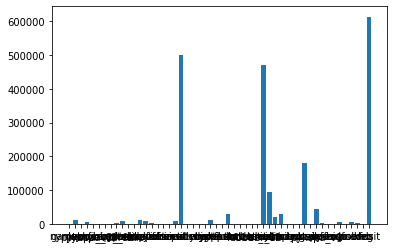

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%s (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=32, n=333 (0.016%)
Class=19, n=12000 (0.578%)
Class=23, n=1158 (0.056%)
Class=47, n=4256 (0.205%)
Class=8, n=492 (0.024%)
Class=38, n=199 (0.010%)
Class=37, n=800 (0.039%)
Class=2, n=104 (0.005%)
Class=39, n=2000 (0.096%)
Class=30, n=8190 (0.394%)
Class=10, n=1000 (0.048%)
Class=35, n=100 (0.005%)
Class=41, n=11160 (0.537%)
Class=27, n=8560 (0.412%)
Class=46, n=2298 (0.111%)
Class=54, n=100 (0.005%)
Class=51, n=20 (0.001%)
Class=7, n=1000 (0.048%)
Class=55, n=9733 (0.469%)
Class=13, n=500540 (24.103%)
Class=25, n=908 (0.044%)
Class=34, n=168 (0.008%)
Class=50, n=32 (0.002%)
Class=12, n=1000 (0.048%)
Class=28, n=10047 (0.484%)
Class=4, n=1000 (0.048%)
Class=1, n=16 (0.001%)
Class=16, n=29999 (1.445%)
Class=9, n=11 (0.001%)
Class=0, n=27 (0.001%)
Class=52, n=510 (0.025%)
Class=17, n=298 (0.014%)
Class=18, n=299 (0.014%)
Class=3, n=469896 (22.628%)
Class=49, n=93707 (4.512%)
Class=40, n=19532 (0.941%)
Class=45, n=28121 (1.354%)
Class=11, n=736 (0.035%)
Class=48, n=193 (0.009%)
Class

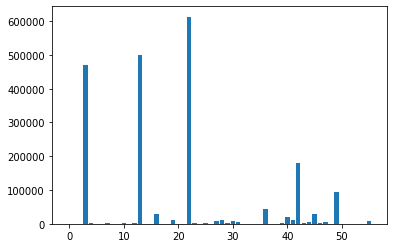

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8,  random_state=42)

Class=emotet, n=400469 (24.106%)
Class=banjori, n=375759 (22.618%)
Class=legit, n=490589 (29.530%)
Class=pykspa_v1, n=35841 (2.157%)
Class=symmi, n=3430 (0.206%)
Class=flubot, n=24017 (1.446%)
Class=tinba, n=74975 (4.513%)
Class=murofet, n=6861 (0.413%)
Class=rovnix, n=143993 (8.667%)
Class=gameover, n=9586 (0.577%)
Class=shiotob, n=4793 (0.289%)
Class=mydoom, n=7980 (0.480%)
Class=virut, n=7803 (0.470%)
Class=ngioweb, n=4178 (0.251%)
Class=ramnit, n=15574 (0.937%)
Class=ranbyus, n=8963 (0.540%)
Class=simda, n=22430 (1.350%)
Class=vawtrak, n=677 (0.041%)
Class=suppobox, n=1825 (0.110%)
Class=necurs, n=6547 (0.394%)
Class=necro, n=2168 (0.130%)
Class=pykspa_v2_fake, n=650 (0.039%)
Class=feodo, n=203 (0.012%)
Class=shifu, n=2061 (0.124%)
Class=conficker, n=403 (0.024%)
Class=fobber_v1, n=247 (0.015%)
Class=fobber_v2, n=236 (0.014%)
Class=proslikefan, n=83 (0.005%)
Class=matsnu, n=718 (0.043%)
Class=cryptolocker, n=786 (0.047%)
Class=bigviktor, n=790 (0.048%)
Class=enviserv, n=398 (0.024%

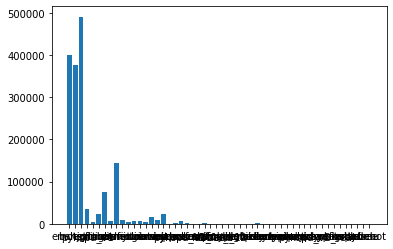

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%s, n=%s (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=13, n=400469 (24.106%)
Class=3, n=375759 (22.618%)
Class=22, n=490589 (29.530%)
Class=36, n=35841 (2.157%)
Class=47, n=3430 (0.206%)
Class=16, n=24017 (1.446%)
Class=49, n=74975 (4.513%)
Class=27, n=6861 (0.413%)
Class=42, n=143993 (8.667%)
Class=19, n=9586 (0.577%)
Class=44, n=4793 (0.289%)
Class=28, n=7980 (0.480%)
Class=55, n=7803 (0.470%)
Class=31, n=4178 (0.251%)
Class=40, n=15574 (0.937%)
Class=41, n=8963 (0.540%)
Class=45, n=22430 (1.350%)
Class=53, n=677 (0.041%)
Class=46, n=1825 (0.110%)
Class=30, n=6547 (0.394%)
Class=29, n=2168 (0.130%)
Class=37, n=650 (0.039%)
Class=15, n=203 (0.012%)
Class=43, n=2061 (0.124%)
Class=8, n=403 (0.024%)
Class=17, n=247 (0.015%)
Class=18, n=236 (0.014%)
Class=35, n=83 (0.005%)
Class=25, n=718 (0.043%)
Class=10, n=786 (0.047%)
Class=4, n=790 (0.048%)
Class=14, n=398 (0.024%)
Class=39, n=1625 (0.098%)
Class=12, n=782 (0.047%)
Class=11, n=585 (0.035%)
Class=32, n=264 (0.016%)
Class=7, n=803 (0.048%)
Class=52, n=401 (0.024%)
Class=34, n=136 (

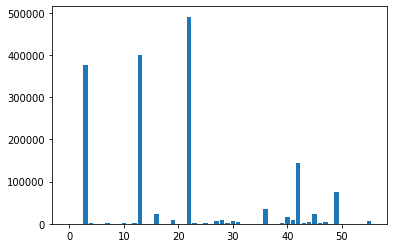

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
grouped=y_train.groupby(y_train)
grouped.count()

family_label
0         17
1         11
2         76
3     375759
4        790
7        803
8        403
9         10
10       786
11       585
12       782
13    400469
14       398
15       203
16     24017
17       247
18       236
19      9586
20        78
21        95
22    490589
23       917
25       718
27      6861
28      7980
29      2168
30      6547
31      4178
32       264
33        29
34       136
35        83
36     35841
37       650
38       164
39      1625
40     15574
41      8963
42    143993
43      2061
44      4793
45     22430
46      1825
47      3430
48       154
49     74975
50        26
51        14
52       401
53       677
54        85
55      7803
Name: family_label, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
strategy = {0:16613,1:16613,2:16613, 4:16613, 7:16613, 8:16613, 9:16613, 10:16613, 11:16613, 12:16613, 14:16613, 15:16613, 18:16613, 17:16613,19:16613, 20:16613,21:16613,23:16613,25:16613,27:16613,28:16613,29:16613,30:16613,31:16613,32:16613,33:16613,34:16613,35:16613,37:16613,38:16613,39:16613,41:16613,43:16613,44:16613,46:16613,47:16613, 48:16613,50:16613,51:16613, 52:16613, 53:16613, 54:16613,55:16613}
#for i in minmum_classes:
ovrsmt = RandomOverSampler(sampling_strategy=strategy)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
udrsmt = RandomUnderSampler(sampling_strategy={42:143527,22:203528,13:193527,3:193529})

In [ ]:
from imblearn.pipeline import Pipeline
steps = [('o', ovrsmt), ('u', udrsmt)]
pipeline = Pipeline(steps=steps)

In [ ]:
X_train, y_train = pipeline.fit_resample(X_train, y_train.family_label)

In [ ]:
grouped=y_train.groupby(y_train)
grouped.count()

family_label
0      16613
1      16613
2      16613
3     193529
4      16613
7      16613
8      16613
9      16613
10     16613
11     16613
12     16613
13    193527
14     16613
15     16613
16     24017
17     16613
18     16613
19     16613
20     16613
21     16613
22    203528
23     16613
25     16613
27     16613
28     16613
29     16613
30     16613
31     16613
32     16613
33     16613
34     16613
35     16613
36     35841
37     16613
38     16613
39     16613
40     15574
41     16613
42    143527
43     16613
44     16613
45     22430
46     16613
47     16613
48     16613
49     74975
50     16613
51     16613
52     16613
53     16613
54     16613
55     16613
Name: family_label, dtype: int64

Class=0, n=16613 (1.025%)
Class=1, n=16613 (1.025%)
Class=2, n=16613 (1.025%)
Class=3, n=193529 (11.937%)
Class=4, n=16613 (1.025%)
Class=7, n=16613 (1.025%)
Class=8, n=16613 (1.025%)
Class=9, n=16613 (1.025%)
Class=10, n=16613 (1.025%)
Class=11, n=16613 (1.025%)
Class=12, n=16613 (1.025%)
Class=13, n=193527 (11.936%)
Class=14, n=16613 (1.025%)
Class=15, n=16613 (1.025%)
Class=16, n=24017 (1.481%)
Class=17, n=16613 (1.025%)
Class=18, n=16613 (1.025%)
Class=19, n=16613 (1.025%)
Class=20, n=16613 (1.025%)
Class=21, n=16613 (1.025%)
Class=22, n=203528 (12.553%)
Class=23, n=16613 (1.025%)
Class=25, n=16613 (1.025%)
Class=27, n=16613 (1.025%)
Class=28, n=16613 (1.025%)
Class=29, n=16613 (1.025%)
Class=30, n=16613 (1.025%)
Class=31, n=16613 (1.025%)
Class=32, n=16613 (1.025%)
Class=33, n=16613 (1.025%)
Class=34, n=16613 (1.025%)
Class=35, n=16613 (1.025%)
Class=36, n=35841 (2.211%)
Class=37, n=16613 (1.025%)
Class=38, n=16613 (1.025%)
Class=39, n=16613 (1.025%)
Class=40, n=15574 (0.961%)
Cla

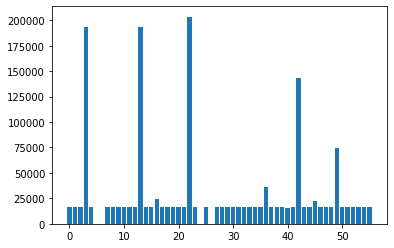

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## AdaBoost Classification


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ABmodel = AdaBoostClassifier(DecisionTreeClassifier())


In [ ]:
ABmodel.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [ ]:
 from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
 y_true, y_pred = y_test, ABmodel.predict(X_test)
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83         5
           2       0.82      1.00      0.90        28
           3       0.98      0.99      0.98     94137
           4       0.20      0.02      0.03       210
           7       0.94      0.97      0.96       197
           8       0.05      0.02      0.03        89
           9       0.00      0.00      0.00         1
          10       0.31      0.12      0.17       214
          11       0.06      0.02      0.03       151
          12       1.00      1.00      1.00       218
          13       1.00      1.00      1.00    100071
          14       0.92      0.95      0.93        94
          15       0.37      0.16      0.22        44
          16       0.90      0.95      0.92      5982
          17       0.05      0.02      0.03        51
          18       0.11      0.05      0.07        63
          19       1.00    

In [ ]:
print('accuracy on the train set: ', accuracy_score(ABmodel.predict(X_train), y_train))
print('accuracy on the test set: ', accuracy_score(y_test, y_pred))

accuracy on the train set:  0.9994109690515122
accuracy on the test set:  0.9596149540001011


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

etpprd = ABmodel.predict_proba(X_test)

In [ ]:
auc = metrics.roc_auc_score(y_test, etpprd, multi_class='ovo', average='weighted')
print(auc)

0.9726640750414914


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_ABmodel_m.sav'
pickle.dump(ABmodel, open(filename, 'wb'))

#### tuning AB

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier())
abparam = {'n_estimators': [50,100],
           'learning_rate': [0.001,0.01, 0.1, 1]
           }

In [ ]:
abclf = HalvingGridSearchCV(clf, abparam, scoring='accuracy').fit(X_train, y_train)

In [ ]:

# summarize results
print("Best: %f using %s" % (abclf.best_score_, abclf.best_params_))
means = abclf.cv_results_['mean_test_score']
stds = abclf.cv_results_['std_test_score']
params = abclf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
 from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
 y_true, y_pred = y_test, abclf.predict(X_test)
 print(classification_report(y_test,y_pred))

In [ ]:
print('accuracy on the train set: ', accuracy_score(abclf.predict(X_train), y_train))
print('accuracy on the test set: ', accuracy_score(y_test, y_pred))

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

pprd = abclf.predict_proba(X_test)

In [ ]:
auc = metrics.roc_auc_score(y_test, pprd, multi_class='ovo', average='weighted')
print(auc)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_ABmodel_m_TN.sav'
pickle.dump(abclf, open(filename, 'wb'))

## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
XGBmodel=xgb_classifier.fit(X_train, y_train)


In [ ]:
XGBpred = XGBmodel.predict(X_test)
print(classification_report(y_test,XGBpred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88       456
           1       0.98      1.00      0.99       436
           2       0.99      0.94      0.97       407
           3       0.94      0.97      0.95     93904
           4       0.00      0.00      0.00       420
           5       1.00      1.00      1.00       416
           6       1.00      1.00      1.00       393
           7       0.94      0.97      0.96       407
           8       0.00      0.00      0.00       381
           9       0.95      1.00      0.98       420
          10       0.95      0.05      0.09       427
          11       0.00      0.00      0.00       427
          12       1.00      1.00      1.00       418
          13       0.98      1.00      0.99     95424
          14       0.95      0.93      0.94       411
          15       0.67      0.37      0.48       407
          16       0.83      0.97      0.89      6065
          17       0.39    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy on the train set: ', accuracy_score(XGBmodel.predict(X_train), y_train))
print('accuracy on the test set: ', accuracy_score(y_test, XGBpred))

accuracy on the train set:  0.927141630652354
accuracy on the test set:  0.9261521135474391


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_UNTSM_XGBmodel.sav'
pickle.dump(XGBmodel, open(filename, 'wb'))

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
DTmodel=dt_classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
DTpred = DTmodel.predict(X_test)
print(classification_report(y_test,DTpred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       456
           1       1.00      1.00      1.00       436
           2       1.00      1.00      1.00       407
           3       0.98      0.98      0.98     93904
           4       0.58      0.75      0.65       420
           5       1.00      1.00      1.00       416
           6       1.00      1.00      1.00       393
           7       0.96      0.99      0.98       407
           8       0.74      0.96      0.84       381
           9       1.00      1.00      1.00       420
          10       0.61      0.77      0.68       427
          11       0.66      0.90      0.76       427
          12       1.00      1.00      1.00       418
          13       1.00      1.00      1.00     95424
          14       0.98      1.00      0.99       411
          15       0.90      1.00      0.95       407
          16       0.90      0.89      0.90      6065
          17       0.85    

In [ ]:
print('accuracy on the train set: ', accuracy_score(DTmodel.predict(X_train), y_train))
print('accuracy on the test set: ', accuracy_score(y_test, DTpred))

accuracy on the train set:  0.9998676840294624
accuracy on the test set:  0.9497272725075704


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_UNTSM_DTmodel.sav'
pickle.dump(DTmodel, open(filename, 'wb'))

## Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et_classifier = ExtraTreesClassifier(n_estimators=100)
ETmodel=et_classifier.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import classification_report
ETpred = ETmodel.predict(X_test)
print(classification_report(y_test,ETpred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.50      1.00      0.67         1
           2       0.90      0.95      0.92        19
           3       1.00      1.00      1.00      3090
           4       0.00      0.00      0.00       218
           7       0.99      0.97      0.98       192
           8       0.15      0.09      0.11        96
          10       0.25      0.12      0.16       196
          11       1.00      1.00      1.00       222
          12       1.00      1.00      1.00    100444
          13       0.91      0.98      0.94      5907
          14       0.17      0.02      0.03        58
          15       0.53      0.46      0.49        57
          16       1.00      0.99      1.00      2379
          17       0.99      1.00      0.99    122358
          18       0.12      0.03      0.04       236
          20       0.00      0.00      0.00         9
          22       0.80    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_UNTSM_DTmodel.sav'
pickle.dump(ETmodel, open(filename, 'wb'))

## Bagged Decision Tree Classifier

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
num_trees = 100
BDTmodel = BaggingClassifier(base_estimator=cart, n_estimators=num_trees).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
BDTpred = BDTmodel.predict(X_test)
print(classification_report(y_test,BDTpred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       442
           1       1.00      1.00      1.00       421
           2       1.00      1.00      1.00       441
           3       0.98      0.99      0.99     94084
           4       0.94      0.80      0.87       398
           5       1.00      1.00      1.00       398
           6       1.00      1.00      1.00       399
           7       0.98      1.00      0.99       436
           8       0.85      0.93      0.88       389
           9       1.00      1.00      1.00       410
          10       0.83      0.81      0.82       422
          11       0.87      0.90      0.88       431
          12       1.00      1.00      1.00       405
          13       1.00      1.00      1.00     95583
          14       0.98      1.00      0.99       410
          15       0.92      1.00      0.96       381
          16       0.90      0.95      0.92      5995
          17       0.83    

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
print('accuracy on the train set: ', accuracy_score(BDTmodel.predict(X_train), y_train))
print('accuracy on the test set: ', accuracy_score(y_test, BDTpred))

accuracy on the train set:  0.9998404958163382
accuracy on the test set:  0.9645538845240138


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_UNTSM_BDTmodel.sav'
pickle.dump(BDTmodel, open(filename, 'wb'))

## Voting ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# create the sub models
estimators = []
model1 = RandomForestClassifier()
estimators.append(('rf', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = XGBClassifier()
estimators.append(('et', model3))

# create the ensemble model
VTensemble = VotingClassifier(estimators,voting='soft').fit(X_train, y_train)

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
VTpred = VTensemble.predict(X_test)
print(classification_report(y_test, VTpred))

In [ ]:
print('accuracy on the train set: ', accuracy_score(y_train, VTensemble.predict(X_train)))
print('accuracy on the test set: ', accuracy_score(y_test, VTpred))

precision on the test set:  0.9865676231166352
accuracy on the test set:  0.9904357543722265


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_UNTSM_VTensemble.sav'
pickle.dump(VTensemble, open(filename, 'wb'))

### Stacking ensemble

In [ ]:
# create the sub models
estimators = []
model1 = RandomForestClassifier()
estimators.append(('rf', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = ExtraTreesClassifier()
estimators.append(('et', model3))

# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
STensemble = StackingClassifier(estimators=estimators,  final_estimator=level1).fit(X_train, y_train)

In [ ]:
print('accuracy on the train set: ', accuracy_score(STensemble.predict(X_train), y_train))

In [ ]:
STpred = STensemble.predict(X_test)
print(classification_report(y_test, STpred))

In [ ]:
print('accuracy on the train set: ', accuracy_score(STensemble.predict(X_train), y_train))
print('accuracy on the test set: ', accuracy_score(y_test, STpred))

precision on the test set:  0.9874852075802033
accuracy on the test set:  0.9905336400417646


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_UNTSM_STensemble.sav'
pickle.dump(STensemble, open(filename, 'wb'))